In [49]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [50]:
# 股價算術平均
def asian_option_simulation(S0, K, T, r, sigma, n, m):
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    sum_payoff = 0

    for i in range(m):
        S = S0
        average_S = S0

        for j in range(n):
            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)
            average_S += S

        average_S /= (n + 1)
        payoff = max(average_S - K, 0)
        sum_payoff += payoff

    option_price = np.exp(-r * T) * (sum_payoff / m)
    return option_price

In [53]:
# 股價幾何平均
def asian_option_simulation_geometric_average(S0, K, T, r, sigma, n, m):
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    sum_payoff = 0

    for i in range(m):
        S = S0
        geometric_average_S = S0

        for j in range(n):
            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)
            geometric_average_S *= S

        geometric_average_S = geometric_average_S ** (1 / (n + 1))
        payoff = max(geometric_average_S - K, 0)
        sum_payoff += payoff

    option_price = np.exp(-r * T) * (sum_payoff / m)
    return option_price

In [51]:
def asian_option_average_strike_simulation(S0, K, T, r, sigma, n, m):
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    sum_strike = 0

    for i in range(m):
        S = S0
        average_strike = 0

        for j in range(n):
            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)
            average_strike += K

        average_strike /= (n + 1)
        payoff = max(average_strike - S, 0)
        sum_strike += payoff

    option_price = np.exp(-r * T) * (sum_strike / m)
    return option_price

In [54]:
# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數
m = 10000  # 模擬的次數

option_price = asian_option_simulation(S0, K, T, r, sigma, n, m)
print("股價算術平均亞式選擇權價格估計：", option_price)

option_price = asian_option_average_strike_simulation(S0, K, T, r, sigma, n, m)
print("履約價算術平均亞式選擇權的履約價的平均估計：", option_price)

option_price = asian_option_simulation_geometric_average(S0, K, T, r, sigma, n, m)
print("股價幾何平均亞式選擇權價格估計：", option_price)

股價算術平均亞式選擇權價格估計： 5.749852962100668
履約價算術平均亞式選擇權的履約價的平均估計： 4.66131210819266
股價幾何平均亞式選擇權價格估計： 5.5180989455225


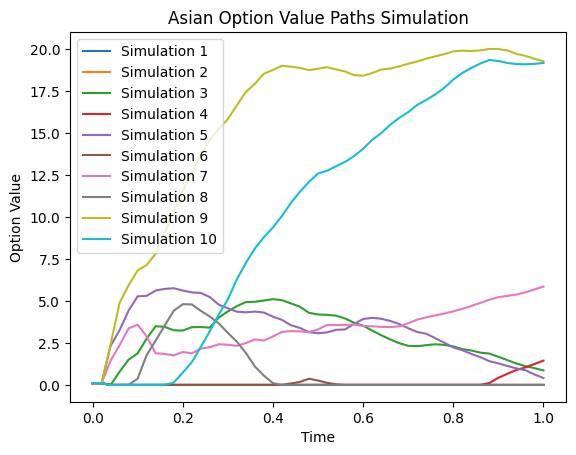

In [48]:
# 股價幾何平均路徑模擬，考慮 K 時間價值
def asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m):
    """
    :param S0: 初始資產價格
    :param K: 選擇權行使價格
    :param T: 選擇權到期日
    :param r: 無風險利率
    :param sigma: 波動率
    :param n: 每期分割的次數
    :param m: 模擬的次數
    :return: 亞式選擇權的價值路徑模擬
    """
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    price_paths = []

    for i in range(m):
        S = S0
        average_price = S0
        price_path = [average_price]

        for j in range(n):
            average_price =  (average_price ** j * S) ** (1 / (j + 1))

            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)

            price_path.append(average_price)
            # 確認S 與 K 在 t 時點價值時否正確
            # print(average_price, K * np.exp(-r * (n - j) * dt))

        # option_value = max(average_price - K, 0)
        price_path = [max(avg_price - K * np.exp(-r * (n - j) * dt), 0) for avg_price in price_path]
        price_paths.append(price_path)


    return price_paths

# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數
m = 10  # 模擬的次數

price_paths = asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m)

# 繪製價值路徑
for i, price_path in enumerate(price_paths):
    plt.plot(np.arange(0, T + T / n, T / n), price_path, label=f'Simulation {i + 1}')

plt.xlabel('Time')
plt.ylabel('Option Value')
plt.title('Asian Option Value Paths Simulation')
plt.legend()
plt.show()

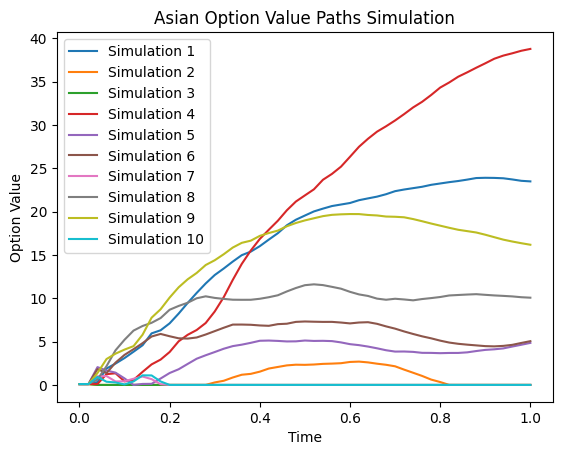

In [55]:
# 股價算數平均路徑模擬，考慮 K 時間價值
def asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m):
    """
    :param S0: 初始資產價格
    :param K: 選擇權行使價格
    :param T: 選擇權到期日
    :param r: 無風險利率
    :param sigma: 波動率
    :param n: 每期分割的次數
    :param m: 模擬的次數
    :return: 亞式選擇權的價值路徑模擬
    """
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    price_paths = []

    for i in range(m):
        S = S0
        average_price = S0
        price_path = [average_price]

        for j in range(n):
            average_price = (average_price * j + S) / (j + 1)

            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)

            price_path.append(average_price)
            # 確認S 與 K 在 t 時點價值時否正確
            # print(average_price, K * np.exp(-r * (n - j) * dt))

        # option_value = max(average_price - K, 0)
        price_path = [max(avg_price - K * np.exp(-r * (n - j) * dt), 0) for avg_price in price_path]
        price_paths.append(price_path)


    return price_paths

# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數
m = 10  # 模擬的次數

price_paths = asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m)

# 繪製價值路徑
for i, price_path in enumerate(price_paths):
    plt.plot(np.arange(0, T + T / n, T / n), price_path, label=f'Simulation {i + 1}')

plt.xlabel('Time')
plt.ylabel('Option Value')
plt.title('Asian Option Value Paths Simulation')
plt.legend()
plt.show()